In [1]:
import warnings
warnings.filterwarnings("ignore")


import requests
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import Holt
from sklearn.model_selection import TimeSeriesSplit 
import seaborn as sns

import wrangle as w

from scipy import stats

In [2]:
btc = w.get_crypto_price('btc', '2018-01-01', '2022-12-12')

In [3]:
btc = w.clean_data(btc)

In [4]:
train = btc[:'2020']
validate = btc['2021']
test = btc['2022']

In [5]:
y = train.btc_volume

In [6]:
#y

<AxesSubplot:xlabel='date'>

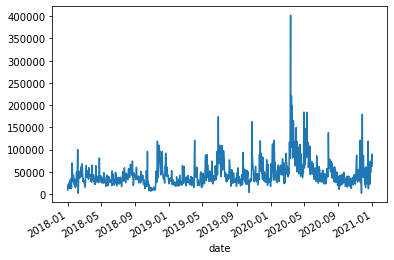

In [7]:
y.plot()

In [22]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_theme(style="whitegrid")
#bx = sns.lineplot(x=y.index, y=y, data=train, color='#77DD77')
#bx.axvline(x=pd.to_datetime('2019-01-01'), color='black')
#bx.axvline(x=pd.to_datetime('2020-01-01'), color='black')
#bx.set(title = 'Volume by Day', xlabel = 'Day', ylabel = 'Volume')
#plt.show()

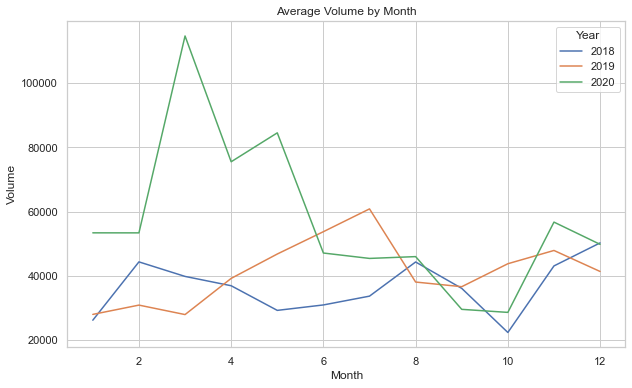

In [23]:
def get_avg_vol_monthly():
    ax = y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
    ax.set(title="Average Volume by Month", xlabel='Month', ylabel='Volume')
    ax.legend(title='Year')
    plt.show()
    
get_avg_vol_monthly()

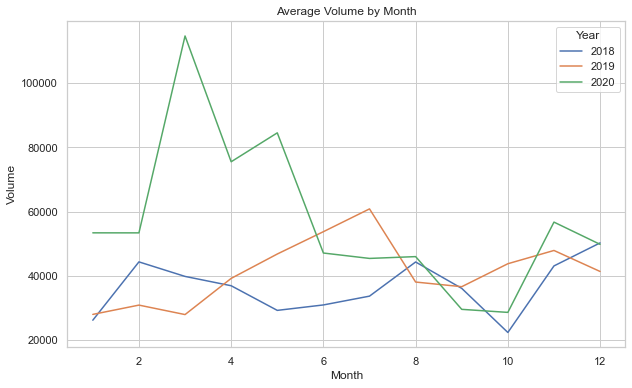

In [24]:
ax = y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
ax.set(title="Average Volume by Month", xlabel='Month', ylabel='Volume')
ax.legend(title='Year')
plt.show()

In [25]:
#y.groupby(y.index.year).mean().plot()

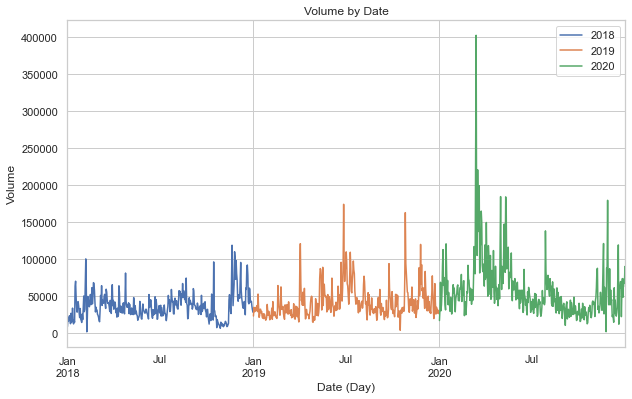

In [26]:
y.groupby([y.index.year]).plot(title= 'Volume by Date', xlabel='Date (Day)', ylabel = 'Volume', legend=True)
plt.show()

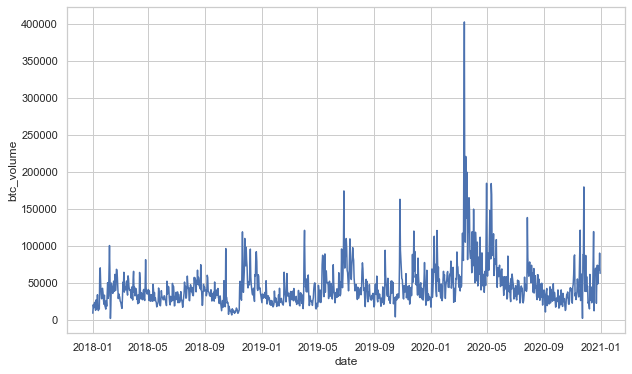

In [27]:
bx = sns.lineplot(x = y.index, y = y)


In [14]:
#sns.pairplot(train, corner=True)
#plt.show()

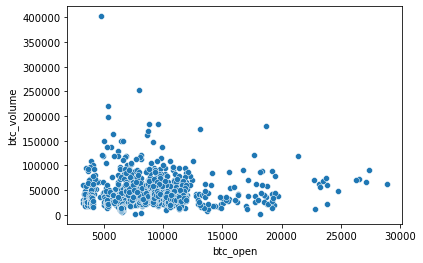

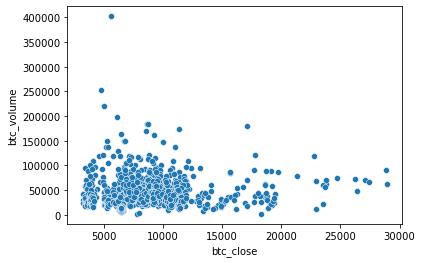

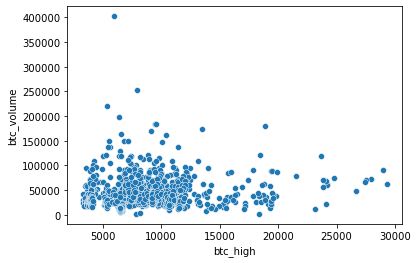

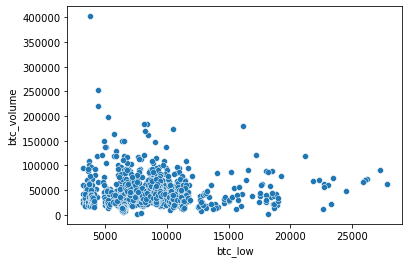

In [15]:
plot_df = train[['btc_open', 'btc_close','btc_high','btc_low']]
for col in plot_df.columns:
    sns.scatterplot(x=plot_df[col], y=y)
    plt.show()

# Statistical Analysis

In [16]:
corr, p = stats.pearsonr(train.btc_volume, train.btc_open)
corr, p

(0.0630546923467122, 0.03695849100094177)

In [17]:
corr, p = stats.pearsonr(train.btc_volume, train.btc_close)
corr, p

(0.06298135910143204, 0.03717916664268657)

In [18]:
corr, p = stats.pearsonr(train.btc_volume, train.btc_high)
corr, p

(0.0888480048800027, 0.0032556004445902778)

In [19]:
corr, p = stats.pearsonr(train.btc_volume, train.btc_low)
corr, p

(0.03465293126325744, 0.2519080976795168)